# Planning observations with `astroplan` - Constraints

In [1]:
import numpy as np

from astropy.table import QTable
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import pytz

from astroplan import Observer, FixedTarget

import warnings
warnings.filterwarnings('ignore', category=Warning)

---

# List Comprehensions

List comprehensions provide a concise way to create lists (arrays). Common applications are to make new lists where each element is the result of some operations applied to each member of another sequence.

### For example: Create the list: `[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]`

In [2]:
squares = []                    # create a blank list

for x in range(10):             # foor loop 0 -> 9
    squares.append(x**2)        # calculate x**2 for each x, add to end of list

squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### You can do the same thing with:

In [3]:
squares = [x**2 for x in range(10)]

squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### You can include `if` statements:

In [4]:
even_squares = []

for x in range(10):
    
    if (x % 2 == 0):
        even_squares.append(x**2)

even_squares

[0, 4, 16, 36, 64]

### You can do the same thing with:

In [5]:
even_squares = [x**2 for x in range(10) if (x % 2 == 0)]

even_squares

[0, 4, 16, 36, 64]

---

# Now to observations

## Let us start with a external list of target objects:

In [6]:
target_table = QTable.read('ObjectList.csv', format='ascii.csv')

In [7]:
target_table

Name,RA,DEC
str11,float64,float64
Aquarius,22.40784,-10.15606
Aries,2.66237,19.95906
Cancer,8.68322,19.1894
Capricornus,21.02258,-18.55051
Gemini,7.15585,23.25312
Leo,10.6933,14.78016
Libra,15.22447,-15.15893
Ophiuchus,17.30225,-5.21711
Pisces,0.64826,10.77037


In [8]:
targets = [FixedTarget(coord=SkyCoord(ra = RA*u.hourangle, dec = DEC*u.deg), name=Name)
           for Name, RA, DEC in target_table]

In [9]:
targets

[<FixedTarget "Aquarius" at SkyCoord (ICRS): (ra, dec) in deg ( 336.1176, -10.15606)>,
 <FixedTarget "Aries" at SkyCoord (ICRS): (ra, dec) in deg ( 39.93555,  19.95906)>,
 <FixedTarget "Cancer" at SkyCoord (ICRS): (ra, dec) in deg ( 130.2483,  19.1894)>,
 <FixedTarget "Capricornus" at SkyCoord (ICRS): (ra, dec) in deg ( 315.3387, -18.55051)>,
 <FixedTarget "Gemini" at SkyCoord (ICRS): (ra, dec) in deg ( 107.33775,  23.25312)>,
 <FixedTarget "Leo" at SkyCoord (ICRS): (ra, dec) in deg ( 160.3995,  14.78016)>,
 <FixedTarget "Libra" at SkyCoord (ICRS): (ra, dec) in deg ( 228.36705, -15.15893)>,
 <FixedTarget "Ophiuchus" at SkyCoord (ICRS): (ra, dec) in deg ( 259.53375, -5.21711)>,
 <FixedTarget "Pisces" at SkyCoord (ICRS): (ra, dec) in deg ( 9.7239,  10.77037)>,
 <FixedTarget "Sagittarius" at SkyCoord (ICRS): (ra, dec) in deg ( 287.7738, -27.09177)>,
 <FixedTarget "Scorpius" at SkyCoord (ICRS): (ra, dec) in deg ( 251.8539, -31.81767)>,
 <FixedTarget "Taurus" at SkyCoord (ICRS): (ra, dec) i

## Observing Night

### You are the most junior member of the team, so you get stuck observing on New Years Eve

In [10]:
observe_date = Time("2018-01-01", format='iso')

### But, you get to observe in Hawaii

In [11]:
my_timezone = pytz.timezone('US/Hawaii')

my_location = Observer.at_site('gemini_north')

In [12]:
observe_start = my_location.sun_set_time(observe_date, which='nearest')
observe_end = my_location.sun_rise_time(observe_date, which='next')

print("Observing starts at {0.iso} UTC".format(observe_start))
print("Observing ends at {0.iso} UTC".format(observe_end))
print("Observing starts at {0} local".format(observe_start.to_datetime(my_timezone)))
print("Observing ends at {0} local".format(observe_end.to_datetime(my_timezone)))

Observing starts at 2018-01-01 07:06:22.567 UTC
Observing ends at 2018-01-01 20:16:58.856 UTC
Observing starts at 2017-12-31 21:06:22.566932-10:00 local
Observing ends at 2018-01-01 10:16:58.856004-10:00 local


In [13]:
# A complete list of built-in observatories can be found by:

#EarthLocation.get_site_names()

In [14]:
observing_length = (observe_end - observe_start).to(u.h)

print("You can observe for {0:.1f} tonight".format(observing_length))

You can observe for 13.2 h tonight


In [15]:
observing_range = [observe_start, observe_end]

## Plot the objects

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range
from astroplan.plots import plot_sky, plot_airmass

In [17]:
time_grid = time_grid_from_range(observing_range)

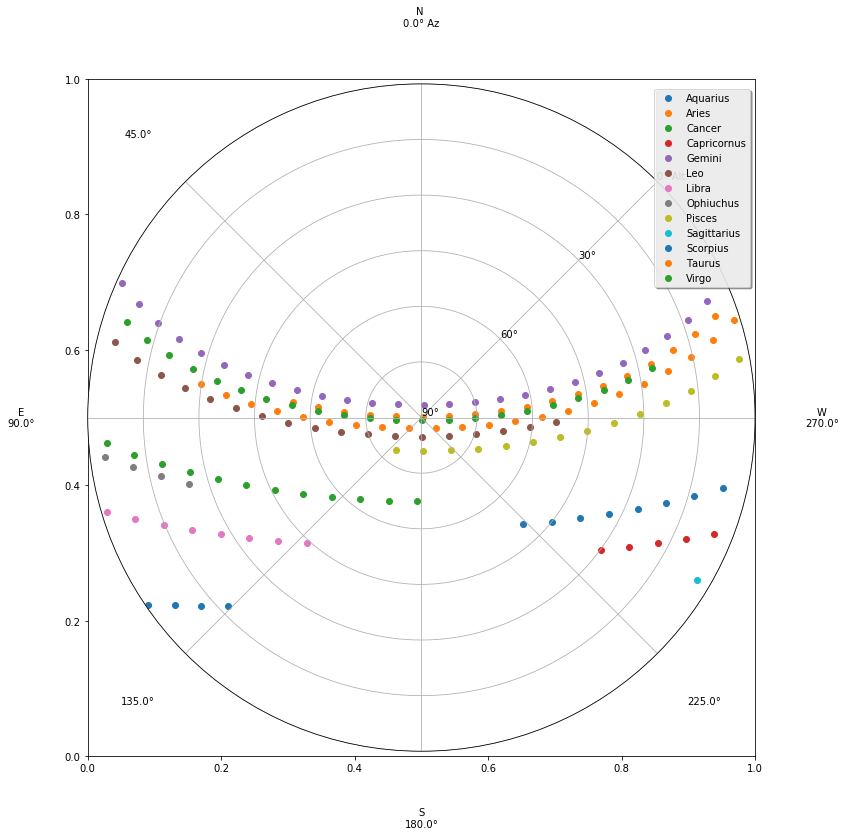

In [18]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()

for my_object in targets:
    ax = plot_sky(my_object, my_location, time_grid)

ax.legend(loc=0,shadow=True);

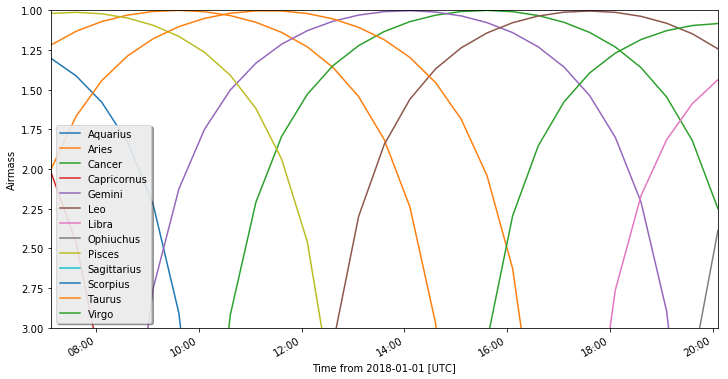

In [19]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

for my_object in targets:
    ax = plot_airmass(my_object, my_location, time_grid)

ax.legend(loc=0,shadow=True);

# Observing Constraints

In [20]:
from astroplan import AltitudeConstraint, AirmassConstraint
from astroplan import observability_table

In [21]:
constraints = [AltitudeConstraint(20*u.deg, 80*u.deg)]

In [22]:
observing_table = observability_table(constraints, my_location, targets, time_range=observing_range)

print(observing_table)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
   Aquarius            True             False              0.222222222222
      Aries            True             False              0.444444444444
     Cancer            True             False               0.62962962963
Capricornus            True             False             0.0740740740741
     Gemini            True             False              0.666666666667
        Leo            True             False              0.444444444444
      Libra            True             False              0.185185185185
  Ophiuchus            True             False              0.037037037037
     Pisces            True             False               0.37037037037
Sagittarius           False             False                         0.0
   Scorpius           False             False                         0.0
     Taurus            True           

## Let us add another constraint

In [23]:
constraints.append(AirmassConstraint(2))

In [24]:
observing_table = observability_table(constraints, my_location, targets, time_range=observing_range)

print(observing_table)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
   Aquarius            True             False              0.148148148148
      Aries            True             False              0.407407407407
     Cancer            True             False              0.518518518519
Capricornus           False             False                         0.0
     Gemini            True             False              0.518518518519
        Leo            True             False              0.407407407407
      Libra            True             False              0.111111111111
  Ophiuchus           False             False                         0.0
     Pisces            True             False              0.333333333333
Sagittarius           False             False                         0.0
   Scorpius           False             False                         0.0
     Taurus            True           

## Additional Constraints

`from astroplan import CONSTRAINT`

* `AtNightConstraint()` - Constrain the Sun to be below horizon.
* `MoonIlluminationConstraint(min, max)` - Constrain the fractional illumination of the Moon.
* `MoonSeparationConstraint(min, max)` - Constrain the separation between the Moon and some targets.
* `SunSeparationConstraint(min, max)` - Constrain the separation between the Sun and some targets.

In [25]:
from astroplan import moon_illumination

In [26]:
moon_illumination(observe_start)

0.9889928944721844

In [27]:
from astroplan import MoonSeparationConstraint

In [28]:
constraints.append(MoonSeparationConstraint(45*u.deg))

In [29]:
observing_table = observability_table(constraints, my_location, targets, time_range=observing_range)

print(observing_table)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
   Aquarius            True             False              0.148148148148
      Aries            True             False              0.407407407407
     Cancer           False             False                         0.0
Capricornus           False             False                         0.0
     Gemini           False             False                         0.0
        Leo            True             False              0.407407407407
      Libra            True             False              0.111111111111
  Ophiuchus           False             False                         0.0
     Pisces            True             False              0.333333333333
Sagittarius           False             False                         0.0
   Scorpius           False             False                         0.0
     Taurus           False           

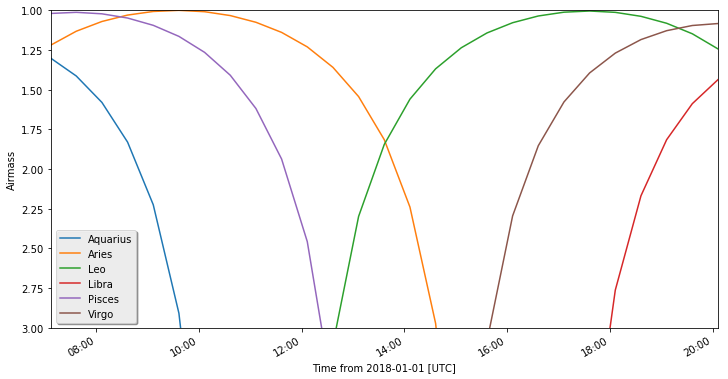

In [30]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

for i, my_object in enumerate(targets):
    
    if observing_table['ever observable'][i]:
        ax = plot_airmass(my_object, my_location, time_grid)

ax.legend(loc=0,shadow=True);

# Conclusion: New Year's Eve 2018, is not the best night to observe